product/productId: B00006HAXW product/title: Rock Rhythm & Doo Wop: Greatest Early Rock product/price: unknown review/userId: A1RSDE90N6RSZF review/profileName: Joseph M. Kotow review/helpfulness: 9/9 review/score: 5.0 review/time: 1042502400 review/summary: Pittsburgh - Home of the OLDIES review/text: I have all of the doo wop DVD's and this one is as good or better than the 1st ones. Remember once these performers are gone, we'll never get to see them again. Rhino did an excellent job and if you like or love doo wop and Rock n Roll you'll LOVE this DVD !! where

product/productId: asin, e.g. amazon.com/dp/B00006HAXW product/title: title of the product product/price: price of the product review/userId: id of the user, e.g. A1RSDE90N6RSZF review/profileName: name of the user review/helpfulness: fraction of users who found the review helpful review/score: rating of the product review/time: time of the review (unix time) review/summary: review summary review/text: text of the review

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame 
import seaborn as sns

from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

import re
import string
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import mean_squared_error


In [2]:
df  = pd.read_csv('Main.csv' , na_values = ' ')
df.head()



c:\users\marmik patani\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,HelpfulnessNumerator,HelpfulnessDenominator
0,7806397051,1,Very oily and creamy. Not at all what I expect...,"01 30, 2014",A1YJEY40YUW4SE,Andrea,Don't waste your money,1391040000,3,4
1,7806397051,3,This palette was a decent price and I was look...,"04 18, 2014",A60XNB876KYML,Jessica H.,OK Palette!,1397779200,1,1
2,7806397051,4,The texture of this concealer pallet is fantas...,"09 6, 2013",A3G6XNM240RMWA,Karen,great quality,1378425600,0,1
3,7806397051,2,I really can't tell what exactly this thing is...,"12 8, 2013",A1PQFP6SAJ6D80,Norah,Do not work on my face,1386460800,2,2
4,7806397051,3,"It was a little smaller than I expected, but t...","10 19, 2013",A38FVHZTNQ271F,Nova Amor,It's okay.,1382140800,0,0


c:\users\marmik patani\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


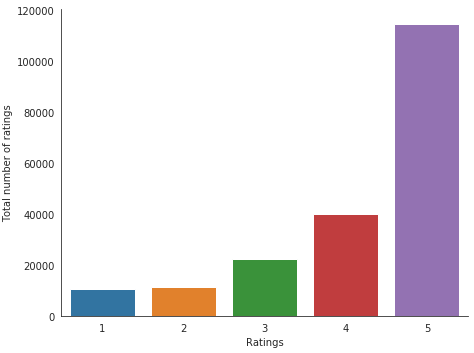

In [3]:
# Check the distribution of the rating
with sns.axes_style('white'):
    g = sns.factorplot("overall", data=df, aspect=1.3,kind='count')
    g.set_xlabels("Ratings") 
    g.set_ylabels("Total number of ratings") 

In [4]:
df.shape

(198502, 10)

In [5]:
#Split the data randomnly into train and test datasets into 70:30 ratio
train_data, test_data = train_test_split(df, test_size = 0.3, random_state=0)

In [6]:
train_data.shape

(138951, 10)

In [7]:
test_data.shape

(59551, 10)

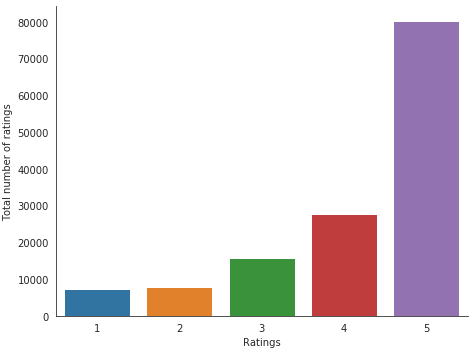

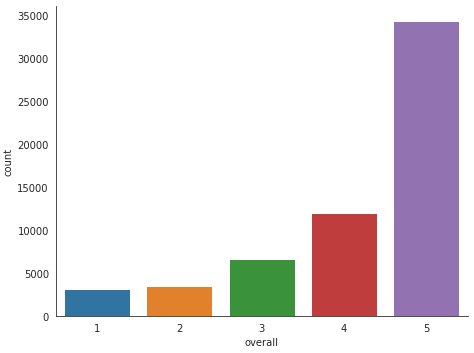

In [8]:
# Check the distribution of the rating
with sns.axes_style('white'):
    g = sns.factorplot("overall", data=train_data, aspect=1.3,kind='count')
    h = sns.factorplot("overall", data=test_data, aspect=1.3,kind='count')
    g.set_xlabels("Ratings") 
    g.set_ylabels("Total number of ratings") 

c:\users\marmik patani\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\marmik patani\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


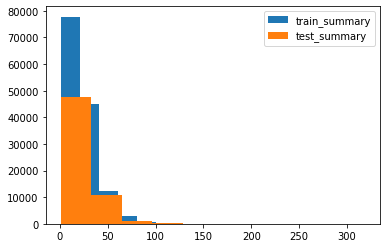

In [9]:
#variation of summary
length_train = train_data['summary'].str.len()
length_test = test_data['summary'].str.len()
plt.hist(length_train,  label="train_summary") 
plt.hist(length_test,  label="test_summary") 
plt.legend() 
plt.show()

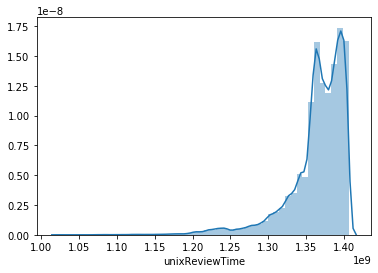

In [10]:
plt.figure(1)
sns.distplot(df['unixReviewTime']); 

In [11]:
df_year=df

In [12]:
df_year['reviewTime']= pd.to_datetime(df_year['reviewTime'])
df_year['year_of_date']= df_year['reviewTime'].dt.strftime('%Y').astype('int64')
df_year.head()

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,HelpfulnessNumerator,HelpfulnessDenominator,year_of_date
0,7806397051,1,Very oily and creamy. Not at all what I expect...,2014-01-30,A1YJEY40YUW4SE,Andrea,Don't waste your money,1391040000,3,4,2014
1,7806397051,3,This palette was a decent price and I was look...,2014-04-18,A60XNB876KYML,Jessica H.,OK Palette!,1397779200,1,1,2014
2,7806397051,4,The texture of this concealer pallet is fantas...,2013-09-06,A3G6XNM240RMWA,Karen,great quality,1378425600,0,1,2013
3,7806397051,2,I really can't tell what exactly this thing is...,2013-12-08,A1PQFP6SAJ6D80,Norah,Do not work on my face,1386460800,2,2,2013
4,7806397051,3,"It was a little smaller than I expected, but t...",2013-10-19,A38FVHZTNQ271F,Nova Amor,It's okay.,1382140800,0,0,2013


In [13]:
df['asin'].nunique()


12101

In [14]:
df['HelpfulnessDenominator'].dropna()


0         4
1         1
2         1
3         2
4         0
5         2
6         3
7         1
8         0
9         0
10        0
11        0
12        1
13        0
14        1
15        0
16        4
17        4
18        1
20        0
21        1
22        4
23        0
24        1
25        1
26        0
27        1
28        2
29        0
30        1
         ..
198471    5
198472    0
198473    0
198475    0
198476    0
198477    0
198478    0
198479    0
198480    0
198481    0
198482    1
198483    0
198484    0
198485    1
198486    1
198487    0
198488    2
198489    1
198490    1
198491    1
198492    0
198493    1
198494    0
198495    2
198496    0
198497    0
198498    0
198499    0
198500    0
198501    1
Name: HelpfulnessDenominator, Length: 192285, dtype: object

In [15]:
df['HelpfulnessDenominator'] = pd.to_numeric(df['HelpfulnessDenominator'], errors='coerce')
df = df.dropna(subset=['HelpfulnessDenominator'])
df['HelpfulnessDenominator'] = df['HelpfulnessDenominator'].astype(np.int64)

c:\users\marmik patani\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
count = df.groupby("asin", as_index=False).count()
mean = df.groupby("asin", as_index=False).mean()

dfMerged = pd.merge(df, count, how='right', on=['asin'])
dfMerged

,asin,overall_x,reviewText_x,reviewTime_x,reviewerID_x,reviewerName_x,summary_x,unixReviewTime_x,HelpfulnessNumerator_x,HelpfulnessDenominator_x,...,overall_y,reviewText_y,reviewTime_y,reviewerID_y,reviewerName_y,summary_y,unixReviewTime_y,HelpfulnessNumerator_y,HelpfulnessDenominator_y,year_of_date_y
0,7806397051,1,Very oily and creamy. Not at all what I expect...,2014-01-30,A1YJEY40YUW4SE,Andrea,Don't waste your money,1391040000,3,4,...,8,8,8,8,8,8,8,8,8,8
1,7806397051,3,This palette was a decent price and I was look...,2014-04-18,A60XNB876KYML,Jessica H.,OK Palette!,1397779200,1,1,...,8,8,8,8,8,8,8,8,8,8
2,7806397051,4,The texture of this concealer pallet is fantas...,2013-09-06,A3G6XNM240RMWA,Karen,great quality,1378425600,0,1,...,8,8,8,8,8,8,8,8,8,8
3,7806397051,2,I really can't tell what exactly this thing is...,2013-12-08,A1PQFP6SAJ6D80,Norah,Do not work on my face,1386460800,2,2,...,8,8,8,8,8,8,8,8,8,8
4,7806397051,3,"It was a little smaller than I expected, but t...",2013-10-19,A38FVHZTNQ271F,Nova Amor,It's okay.,1382140800,0,0,...,8,8,8,8,8,8,8,8,8,8
5,7806397051,5,"I was very happy to get this palette, now I wi...",2013-04-15,A3BTN14HIZET6Z,"S. M. Randall ""WildHorseWoman""",Very nice palette!,1365984000,1,2,...,8,8,8,8,8,8,8,8,8,8
6,7806397051,1,PLEASE DONT DO IT! this just rachett the palet...,2013-08-16,A1Z59RFKN0M5QL,"tasha ""luvely12b""",smh!!!,1376611200,1,3,...,8,8,8,8,8,8,8,8,8,8
7,7806397051,2,"Chalky,Not Pigmented,Wears off easily,Not a Co...",2013-09-04,AWUO9P6PL1SY8,TreMagnifique,"Chalky, Not Pigmented, Wears off easily, Not a...",1378252800,0,1,...,8,8,8,8,8,8,8,8,8,8
8,9759091062,2,Did nothing for me. Stings when I put it on. I...,2014-07-13,A3LMILRM9OC3SA,NaN,"no Lightening, no Brightening,......NOTHING",1405209600,0,0,...,11,11,11,11,10,11,11,11,11,11
9,9759091062,3,I bought this product to get rid of the dark s...,2013-12-27,A30IP88QK3YUIO,Amina Bint Ibraheem,Its alright,1388102400,0,0,...,11,11,11,11,10,11,11,11,11,11


In [17]:
#rename columns
dfMerged["totalReviewers"] = dfMerged["reviewerID_y"]
dfMerged["overallScore"] = dfMerged["overall_x"]
dfMerged["summaryReview"] = dfMerged["summary_x"]

dfNew = dfMerged[['asin','summaryReview','overallScore',"totalReviewers"]]

In [18]:
#Products with more than 100 reviews
dfMerged = dfMerged.sort_values(by='totalReviewers', ascending=False)
dfCount = dfMerged[dfMerged.totalReviewers >= 100]
dfCount

,asin,overall_x,reviewText_x,reviewTime_x,reviewerID_x,reviewerName_x,summary_x,unixReviewTime_x,HelpfulnessNumerator_x,HelpfulnessDenominator_x,...,reviewerID_y,reviewerName_y,summary_y,unixReviewTime_y,HelpfulnessNumerator_y,HelpfulnessDenominator_y,year_of_date_y,totalReviewers,overallScore,summaryReview
108245,B004OHQR1Q,5,"A nice variety of tips, only two being of the ...",2013-09-18,A1FH6V5CP22ECC,"K. Davis ""Katarica""",Just As Described,1379462400,0,0,...,429,429,429,429,429,429,429,429,5,Just As Described
108300,B004OHQR1Q,4,"This product is just as advertised, the only r...",2013-08-09,A3QD7F0DVW4R68,Marge,Works well,1376006400,0,0,...,429,429,429,429,429,429,429,429,4,Works well
108310,B004OHQR1Q,5,they seem to be great and work great and they ...,2013-10-12,A36077FCE7XSEK,mayra,this are great,1381536000,0,0,...,429,429,429,429,429,429,429,429,5,this are great
108309,B004OHQR1Q,5,Each dotting pen has two different sized tips ...,2013-09-06,A2NGLQZKRHT4J3,"Matthew Castle ""Chisken""",10 sizes!,1378425600,0,0,...,429,429,429,429,429,429,429,429,5,10 sizes!
108308,B004OHQR1Q,5,I've had a great deal of fun with these. They...,2013-07-07,AIX5SZ6TD472,Mary Wegmeyer,These are great!,1373155200,0,0,...,429,429,429,429,429,429,429,429,5,These are great!
108307,B004OHQR1Q,5,I use these to apply nail polish patterns to m...,2013-08-15,AZIJ44I4NIO5M,"Martha A. Koeppe ""wildbearies""",Neat little tools,1376524800,1,1,...,429,429,429,429,429,429,429,429,5,Neat little tools
108306,B004OHQR1Q,5,This dotting pen set for nail art manicure is ...,2013-07-01,A2A0MN26VVEUVK,"Mariluz Garcia ""garciaml""",Good value for money.,1372636800,0,0,...,429,429,429,429,429,429,429,429,5,Good value for money.
108305,B004OHQR1Q,4,"The dotting tools are good for nail art, but I...",2012-08-08,A3TU2IGQH5K2KV,Mari G,Good...But,1344384000,0,0,...,429,429,429,429,429,429,429,429,4,Good...But
108304,B004OHQR1Q,5,If you love nail art these are a must have. Yo...,2013-03-30,ARWGSFZJBDBGW,mariana,great items,1364601600,0,0,...,429,429,429,429,429,429,429,429,5,great items
108303,B004OHQR1Q,5,The dotting tools are very comfortable to use ...,2013-08-15,A3SJ6UTUVWFS7K,Maria,they are so helpfull,1376524800,1,1,...,429,429,429,429,429,429,429,429,5,they are so helpfull


In [19]:
#Grouping all the summary Reviews by product ID
dfProductReview = df.groupby("asin",as_index=False).mean()

In [20]:
dfProductReview

,asin,overall,unixReviewTime,HelpfulnessNumerator,HelpfulnessDenominator,year_of_date
0,7806397051,2.625000,1.382087e+09,1.000000,1.750000,2013.250000
1,9759091062,3.090909,1.390930e+09,0.363636,1.000000,2013.636364
2,9788072216,5.000000,1.349093e+09,0.750000,1.250000,2012.250000
3,9790790961,4.333333,1.378858e+09,0.333333,0.833333,2013.333333
4,9790794231,3.600000,1.298212e+09,0.600000,2.000000,2010.800000
5,B00004TMFE,3.318182,1.360714e+09,1.090909,1.090909,2012.636364
6,B00004TUBL,4.428571,1.360179e+09,0.571429,0.714286,2012.666667
7,B00004TUBV,4.400000,1.367505e+09,0.000000,0.000000,2012.800000
8,B00004U9UY,4.538462,1.358500e+09,0.230769,0.230769,2012.615385
9,B00004U9V2,4.714286,1.385202e+09,0.000000,0.142857,2013.428571


In [21]:
ProductReviewSummary = dfCount.groupby("asin")["summaryReview"].apply(list)
ProductReviewSummary = pd.DataFrame(ProductReviewSummary)
ProductReviewSummary.to_csv("ProductReviewSummary.csv")

In [22]:
#creating dataframe with certain col
df3 = pd.read_csv("ProductReviewSummary.csv")
df3 = pd.merge(df3, dfProductReview, on="asin", how='inner')
df3.head()

,asin,summaryReview,overall,unixReviewTime,HelpfulnessNumerator,HelpfulnessDenominator,year_of_date
0,B0000632EN,"[""One of the Worst Face Products I've Ever Use...",3.786207,1.364538e+09,0.868966,1.062069,2012.800000
1,B0000CC64W,"['No miracles!', 'Life saver', 'Olay Regeneris...",4.281481,1.352515e+09,0.844444,0.985185,2012.444444
2,B000142C1A,"['Good color', 'Nice reddish burgundy shimmer'...",4.482456,1.362129e+09,0.464912,0.508772,2012.763158
3,B000142FVW,"['A winner', 'Great!', 'Great color', 'Finally...",4.550000,1.355329e+09,0.370000,0.423333,2012.453333
4,B00016XJ4M,"['Great toner', 'NICE FRESH SCENT', 'Lovely pr...",4.476190,1.369087e+09,0.542857,0.657143,2012.923810


In [23]:

df3 = df3[['asin','summaryReview','overall']]

# Text Cleaning - Summary column

In [24]:
#function for tokenizing summary
regEx = re.compile('[^a-z]+')
def cleanReviews(reviewText):
    reviewText = reviewText.lower()
    reviewText = regEx.sub(' ', reviewText).strip()
    return reviewText



In [25]:
#reset index and drop duplicate rows
df3["summaryClean"] = df3["summaryReview"].apply(cleanReviews)
df3 = df3.drop_duplicates(['overall'], keep='last')
df3 = df3.reset_index()

In [26]:
reviews = df3["summaryClean"] 
countVector = CountVectorizer(max_features = 300, stop_words='english') 
transformedReviews = countVector.fit_transform(reviews) 

dfReviews = DataFrame(transformedReviews.A, columns=countVector.get_feature_names())
dfReviews = dfReviews.astype(int)
dfReviews.head()

,absolutely,acne,adovia,affordable,amazing,application,apply,argan,art,away,...,wipes,wish,wonderful,work,worked,working,works,worth,wow,yes
0,0,3,0,0,0,0,0,0,0,2,...,0,0,1,3,0,0,3,2,1,2
1,0,0,0,0,1,0,0,0,0,0,...,0,0,3,2,0,0,8,1,0,0
2,0,0,0,0,2,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,2,0,0,4,0,0,0,0,0,...,0,0,6,0,0,0,5,0,0,2
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0


In [27]:
#save 
dfReviews.to_csv("dfReviews.csv")

In [1]:
# First let's create a dataset called X
X = np.array(dfReviews)
 # create train and test
tpercent = 0.9
tsize = int(np.floor(tpercent * len(dfReviews)))
dfReviews_train = X[:tsize]
dfReviews_test = X[tsize:]
#len of train and test
lentrain = len(dfReviews_train)
lentest = len(dfReviews_test)

NameError: name 'np' is not defined

In [29]:
tsize

142

In [30]:
# KNN classifier to find similar products
print(lentrain)
print(lentest)

142
16


In [31]:
neighbor = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(dfReviews_train)

# Let's find the k-neighbors of each point in object X. To do that we call the kneighbors() function on object X.
distances, indices = neighbor.kneighbors(dfReviews_train)

In [32]:
#find most related products
for i in range(lentest):
    a = neighbor.kneighbors([dfReviews_test[i]])
    related_product_list = a[1]

    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    
    print ("Based on product reviews, for ", df3["asin"][lentrain + i] ," average rating is ",df3["overall"][lentrain + i])
    print ("The first similar product is ", df3["asin"][first_related_product] ," average rating is ",df3["overall"][first_related_product])
    print ("The second similar product is ", df3["asin"][second_related_product] ," average rating is ",df3["overall"][second_related_product])
    print ("-----------------------------------------------------------")

Based on product reviews, for  B00AWLB9G6  average rating is  4.39622641509434
The first similar product is  B00AO4E9MC  average rating is  4.333333333333333
The second similar product is  B007RTR8T8  average rating is  4.107843137254902
-----------------------------------------------------------
Based on product reviews, for  B00AWLB9I4  average rating is  4.207920792079208
The first similar product is  B00AO4E9MC  average rating is  4.333333333333333
The second similar product is  B007RTR8T8  average rating is  4.107843137254902
-----------------------------------------------------------
Based on product reviews, for  B00C8YCFU4  average rating is  4.658914728682171
The first similar product is  B000F63TW0  average rating is  4.352
The second similar product is  B0089JVDPK  average rating is  4.408695652173913
-----------------------------------------------------------
Based on product reviews, for  B00G5WO2VK  average rating is  4.756521739130434
The first similar product is  B007Q0

In [33]:
print ("Based on product reviews, for ", df3["asin"][26] ," average rating is ",df3["overall"][26])
print ("The first similar product is ", df3["asin"][first_related_product] ," average rating is ",df3["overall"][first_related_product])
print ("The second similar product is ", df3["asin"][second_related_product] ," average rating is ",df3["overall"][second_related_product])
print ("-----------------------------------------------------------")

Based on product reviews, for  B00188IFHS  average rating is  4.23
The first similar product is  B00AO4EKSU  average rating is  4.095652173913043
The second similar product is  B0030HKJ8I  average rating is  4.326241134751773
-----------------------------------------------------------


# Pedicting Review Score with k=3

In [34]:

df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)

n_neighbors = 3
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)

print(classification_report(df5_test_target, knnpreds_test))

              precision    recall  f1-score   support

           4       1.00      1.00      1.00        16

   micro avg       1.00      1.00      1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



# Accuracy of the Model

In [2]:
print (accuracy_score(df5_test_target, knnpreds_test))

NameError: name 'accuracy_score' is not defined

In [36]:

print(mean_squared_error(df5_test_target, knnpreds_test))

0.0


# Predicting reviews with 85, 15 train, test split and k = 3

In [37]:
# First let's create a dataset called X
X = np.array(dfReviews)
 # create train and test
tpercent = 0.85
tsize = int(np.floor(tpercent * len(dfReviews)))
dfReviews_train = X[:tsize]
dfReviews_test = X[tsize:]
#len of train and test
lentrain = len(dfReviews_train)
lentest = len(dfReviews_test)

In [38]:
tsize

134

In [39]:
# Next we will instantiate a nearest neighbor object, and call it nbrs. Then we will fit it to dataset X.
neighbor = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(dfReviews_train)

# Let's find the k-neighbors of each point in object X. To do that we call the kneighbors() function on object X.
distances, indices = neighbor.kneighbors(dfReviews_train)

In [40]:
#find most related products
for i in range(lentest):
    a = neighbor.kneighbors([dfReviews_test[i]])
    related_product_list = a[1]

    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    
    print ("Based on product reviews, for ", df3["asin"][lentrain + i] ," average rating is ",df3["overall"][lentrain + i])
    print ("The first similar product is ", df3["asin"][first_related_product] ," average rating is ",df3["overall"][first_related_product])
    print ("The second similar product is ", df3["asin"][second_related_product] ," average rating is ",df3["overall"][second_related_product])
    print ("-----------------------------------------------------------")


Based on product reviews, for  B00AHF1GK6  average rating is  4.181286549707602
The first similar product is  B001RMP7M6  average rating is  4.657657657657658
The second similar product is  B007BJ3KQ4  average rating is  4.395161290322581
-----------------------------------------------------------
Based on product reviews, for  B00AHF1GTM  average rating is  4.336633663366337
The first similar product is  B0090UJFYI  average rating is  4.339622641509434
The second similar product is  B0030HKJ8I  average rating is  4.326241134751773
-----------------------------------------------------------
Based on product reviews, for  B00AO379NE  average rating is  4.401869158878505
The first similar product is  B004LUZ956  average rating is  3.9902912621359223
The second similar product is  B000PLUZL8  average rating is  4.08411214953271
-----------------------------------------------------------
Based on product reviews, for  B00AO4E9MC  average rating is  4.333333333333333
The first similar produ

# Predicting Review Score with k = 5

In [41]:
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)

n_neighbors = 5
knnclf = neighbors.KNeighborsClassifier(n_neighborshbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)
#print (knnpreds_test)

print(classification_report(df5_test_target, knnpreds_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       1.00      0.83      0.91        24

   micro avg       0.83      0.83      0.83        24
   macro avg       0.50      0.42      0.45        24
weighted avg       1.00      0.83      0.91        24



c:\users\marmik patani\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [42]:
print (accuracy_score(df5_test_target, knnpreds_test))

0.8333333333333334


In [43]:
print(mean_squared_error(df5_test_target, knnpreds_test))

0.16666666666666666


# kNN with k = 3, Algorithm = Brute

In [44]:
neighbor = NearestNeighbors(n_neighbors=3, algorithm='brute').fit(dfReviews_train)

distances, indices = neighbor.kneighbors(dfReviews_train)

In [45]:
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)
n_neighbors = 3
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)

print(classification_report(df5_test_target, knnpreds_test))
print ("Accuracy: ",accuracy_score(df5_test_target, knnpreds_test))
print("MSE: ",mean_squared_error(df5_test_target, knnpreds_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       1.00      0.92      0.96        24

   micro avg       0.92      0.92      0.92        24
   macro avg       0.50      0.46      0.48        24
weighted avg       1.00      0.92      0.96        24

Accuracy:  0.9166666666666666
MSE:  0.08333333333333333


c:\users\marmik patani\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# kNN with k= 5, and Algorithm = KD_Tree

In [46]:

neighbor = NearestNeighbors(n_neighbors=5, algorithm='kd_tree').fit(dfReviews_train)
distances, indices = neighbor.kneighbors(dfReviews_train)

In [47]:
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)
n_neighbors = 5
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)

print(classification_report(df5_test_target, knnpreds_test))
print ("Accuracy: ",accuracy_score(df5_test_target, knnpreds_test))
print("MSE: ",mean_squared_error(df5_test_target, knnpreds_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       1.00      0.83      0.91        24

   micro avg       0.83      0.83      0.83        24
   macro avg       0.50      0.42      0.45        24
weighted avg       1.00      0.83      0.91        24

Accuracy:  0.8333333333333334
MSE:  0.16666666666666666


c:\users\marmik patani\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# Word correltation based on cluster

In [48]:
cluster = df.groupby("overall")["summary"].apply(list)
cluster = pd.DataFrame(cluster)
cluster.to_csv("cluster.csv")
cluster1 = pd.read_csv("cluster.csv")
cluster1["summaryClean"] = cluster1["summary"].apply(cleanReviews)

# World Clouding for Each Score Group

In [49]:

stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=500,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(12,12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

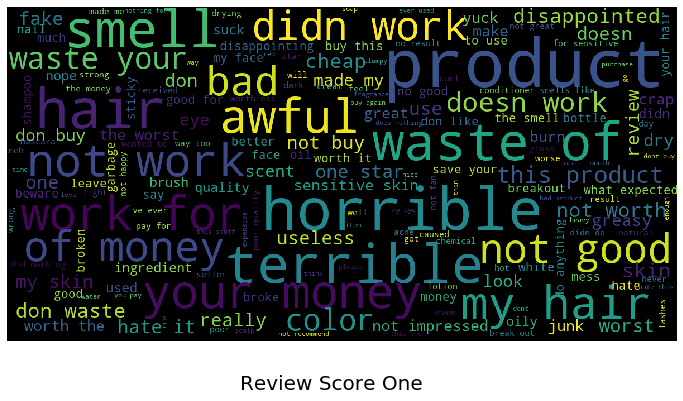

In [50]:
show_wordcloud(cluster1["summaryClean"][0], title = "Review Score One")

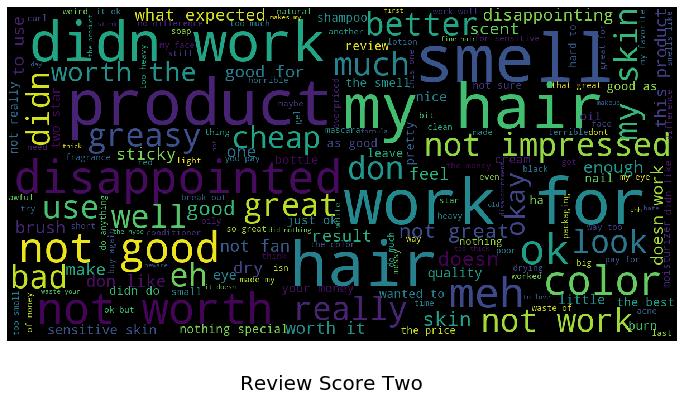

In [51]:
show_wordcloud(cluster1["summaryClean"][1], title = "Review Score Two")

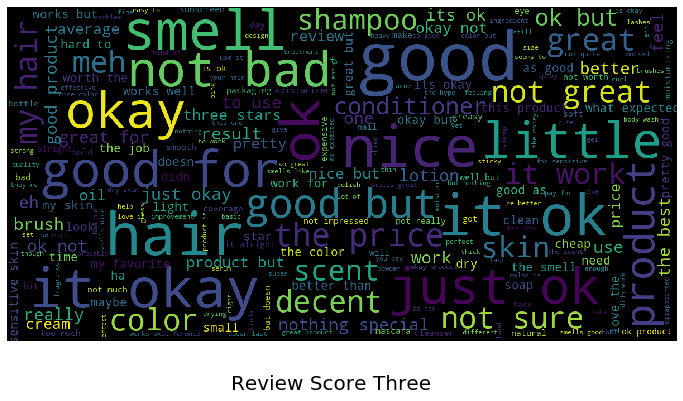

In [52]:
show_wordcloud(cluster1["summaryClean"][2], title = "Review Score Three")

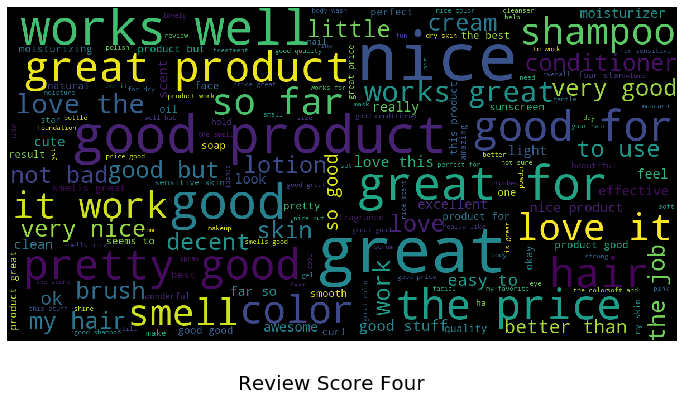

In [53]:
show_wordcloud(cluster1["summaryClean"][3], title = "Review Score Four")

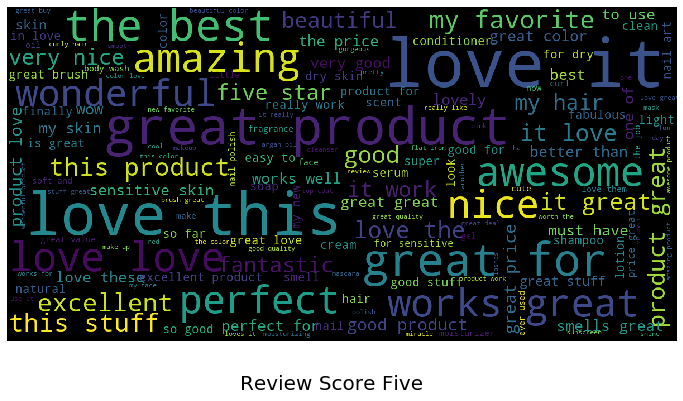

In [54]:
show_wordcloud(cluster1["summaryClean"][4], title = "Review Score Five")